# Q. Build a simple linear regression model by performing EDA and do necessary transformations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# 1)Delivery_time -> Predict delivery time using sorting time 

In [2]:
delivery_data=pd.read_csv(r"C:\Users\shrut\Downloads\delivery_time.csv")
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA & Data Visualization

In [3]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

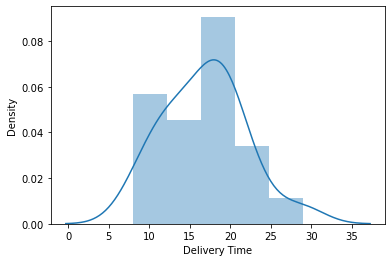

In [4]:
sns.distplot(delivery_data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

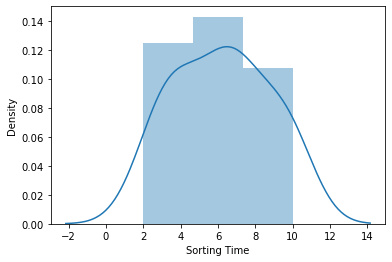

In [5]:
sns.distplot(delivery_data['Sorting Time'])

Feature Engineering

In [6]:
# Renaming Column
delivery_data=delivery_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

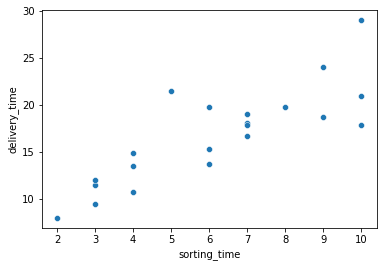

In [46]:
# Use scatter plot to check if data is linear
sns.scatterplot(x = delivery_data['sorting_time'], y = delivery_data['delivery_time'])

Correlation Analysis

In [7]:
delivery_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

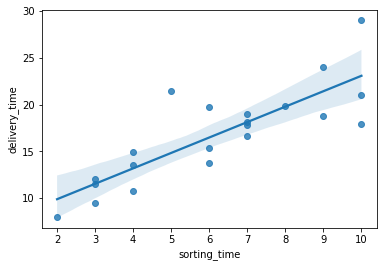

In [8]:
sns.regplot(x=delivery_data['sorting_time'],y=delivery_data['delivery_time'])

Since, here the data is highly correlated and only one independent variable (x) is given to predict the dependent variable (y) we can build a simple linear regression model.

Model Building

In [9]:
model=smf.ols("delivery_time~sorting_time",data=delivery_data).fit()

Model Testing

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        07:58:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since R-squared value is less ,its not a good model.Hence, we need to improve  our model.

In [10]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=delivery_data).fit()

In [11]:
# Transforming using log function
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        16:10:09   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model didn't improved much

In [36]:
# Transforming using squareroot function
model2=smf.ols("delivery_time~np.sqrt(sorting_time)",data=delivery_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.61e-06
Time:                        16:23:22   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compared to the Rsquare value from the first model the Rsquare value of this model is good and improved so we can accept it.

Model Predictions

In [37]:
# Manual prediction for say sorting time 5
delivery_time=(6.582734)+(1.649020)*(5)
delivery_time

14.827834

In [38]:
# Automatic Prediction for say sorting time 8,12
data=pd.Series([8,12])
data

0     8
1    12
dtype: int64

In [39]:
# creating a DataFrame of new Sorting_Time values
data_pred=pd.DataFrame(data,columns=['sorting_time'])
data_pred

,sorting_time
0,8
1,12


In [42]:
# Predicting the Delivery_Time using the new Sorting_Time values
model2.predict(data_pred)

0    19.929232
1    24.974320
dtype: float64

# 2)Salary_hike -> Build a prediction model for Salary_hike


In [44]:
salary_data=pd.read_csv(r"C:\Users\shrut\Downloads\Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
salary_data.Salary

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

EDA & Data Visualization

In [48]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

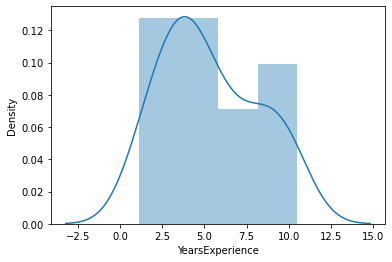

In [23]:
sns.distplot(salary_data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

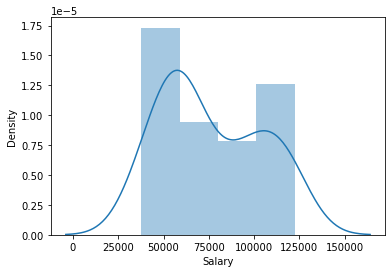

In [24]:
sns.distplot(salary_data['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

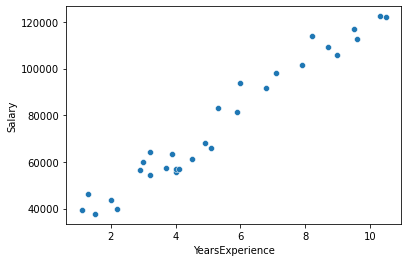

In [49]:
# Use scatter plot to check if data is linear
sns.scatterplot(x = salary_data['YearsExperience'], y = salary_data['Salary'])

Correlation Analysis

In [25]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

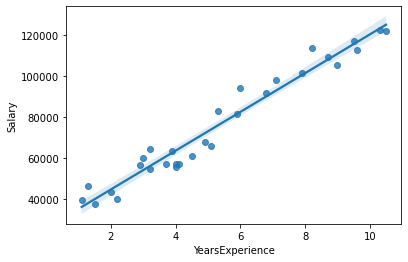

In [27]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

Model Building

In [51]:
model=smf.ols("Salary~YearsExperience",data=salary_data).fit()

Model Testing

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        17:47:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared value > 0.8 , we can consider this  as a good model.

In [54]:
# Transforming using log function
model1 = smf.ols("Salary~np.log(YearsExperience)" , data = salary_data ).fit()
model1.rsquared

0.853888882875697

 Here, R squared value is less than the previous model so we will use the previous model.

Model Predictions

In [55]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [61]:
# Predicting Salary for 32 , 18 years of exp
data=pd.Series([32,18])
data

0    32
1    18
dtype: int64

In [62]:
data_pred=pd.DataFrame(data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,32
1,18


In [63]:
# predicting using 1st model
model.predict(data_pred)

0    328190.994485
1    195891.521985
dtype: float64